**Task:**  To use Image Classification Techniques to identify handwritten digits.

**About:**
The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

The %matplotlib inline command tells the IPython environment to draw the plots immediately after the current cell. The drawn plots are shown below the code and stored in the notebook document for future reference.

In [114]:
%matplotlib inline

##The task
The goal is to contruct and train an artificial neural network on thousands of images of handwritten digits so that it may successfully identify others when presented. The data that will be incorporated is the MNIST database which contains 60000 images for training and 10000 test images, We will use the keras Python API with TensorFlow as the backend.

### **Method 1: Without Convolution**

Building a network that accepts the normalized pixel values of each value and operate solely based on those values.

#**Step 1: Prequisite Python Modules**
We import all the necessary libraries which will be useful for building the neural Network.

Info:
Keras is the high-level API of TensorFlow 2: an approachable, highly-productive interface for solving machine learning problems, with a focus on modern deep learning. It provides essential abstractions and building blocks for developing and shipping machine learning solutions with high iteration velocity

In [115]:
import numpy as np                  # advanced math library
import matplotlib.pyplot as plt     # MATLAB helps with plotting.
import random                       # for generating random numbers

from keras.datasets import mnist    # Keras provides a dummy dataset whci his called MNIST dataset
from keras.models import Sequential # Model type to be used

from keras.layers.core import Dense, Dropout, Activation  # Types of layers to be used in the model
from keras.utils import np_utils                          # Keras provides numpy utility library, which provides functions to perform actions on numpy arrays

# **Step 2: Splitting the dataset into Train and Test**

In [116]:
# The MNIST data is split between 60,000 image (26 X 28 px)
# training images and 10,000 images (28 x 28 px)

(X_train, y_train), (X_test,y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("Y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("Y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
Y_train shape (60000,)
X_test shape (10000, 28, 28)
Y_test shape (10000,)


## **Step 3: Using matplotlib , we can plot some sample images from the training set directly into this google colab notebook. This is done just to observe training set (Images) of the dataset.**

Few parameters of the plt.imshow() are:
1. cmap : This parameter is a colormap instance or registered colormap name.For displaying a grayscale image set up the colormapping using the parameters cmap='gray', vmin=0, vmax=255
2. interpolation : This parameter is the interpolation method which used to display an image.

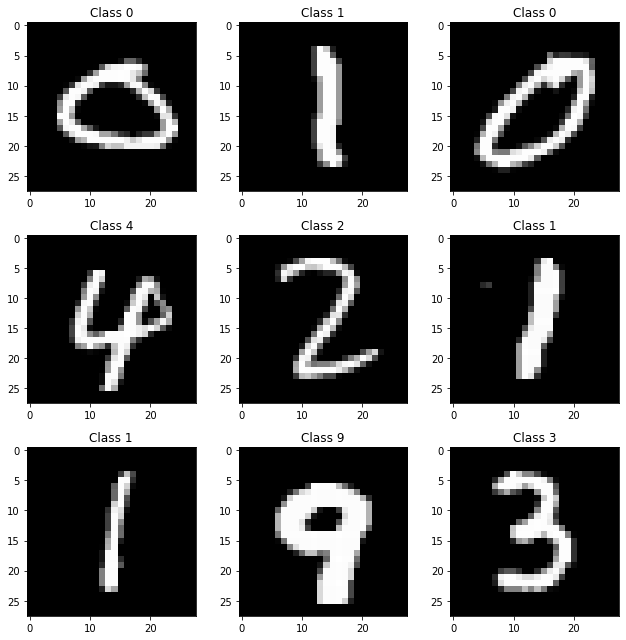

In [117]:
plt.rcParams['figure.figsize'] = (9,9)                          # Make the figures a bit bigger
for i in range(9):
    plt.subplot(3,3,i+1)                                        # Creating a matrix of 3X3, to display the images.
    num = random.randint(0, len(X_train))                       # Now at each iteration a random number between 0 and 60,000 is selected,
                                                                # one of the image at the index of num is displayed as one of the elements of the matrix.
    plt.imshow(X_train[num], cmap='gray', interpolation=None, vmin=0, vmax=255)    # The imshow() function in pyplot module of matplotlib 
                                                                # library is used to display data as an image; i.e. on a 2D regular raster.
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

Let's examine a single digit a little closer, and print out the array

In [118]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")
# now print!        
matprint(X_train[num])

0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0    0    3   82  254  208  133  133   71   11    0    0    0    0   0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0   40  171  253  253  253  253  253  254  243  128    9    0    0   0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  169  253  253  253  239  159  217  254  253  253   84    0    0   0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0   57  113  170   84   52    0    0  150  253  253  108    0    0   0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0    0    0    0    7  202  253  205    0    0   0  0  0  0  0  0 

Each pixel is a 8-bit integer from 0-255. 0 is full black while 255 is full white. This what we call a single-channel pixel it's called monochrome.


Formatting the input datra layer instead of 28 x 28 matrix, we build our network to accept 


## **Step 4: Feature tranformation** 

A. Reshaping the train and test data from 28 x 28 to 784. Which is basically passing each pixel to the neural Network. Here, we are directly doing Flattening.

In [119]:
X_train = X_train.reshape(60000 , 784)  # reshape 60,000 28 x 28 matrices into 784
X_test = X_test.reshape(10000, 784)     # reshape 10,000 28 x 28 matrices into 784

In [120]:
X_train.dtype # the data is of type integer

dtype('uint8')

B. All the math involved for neural network is continuous and not discrete, if we do not convert the data type explicitly, at some point in pipeline the values will be converted to float. Also, it is the best practice to convert the values explicitly as some frameworks might give the error when the inputs are not of expected data type.

In [121]:
X_train = X_train.astype('float32')  #Change integers to 32-bit floating point
X_test = X_test.astype('float32')

C. Normailizing using min-max Method

The reason why we normalize each pixel value is neural network learns its weights by continually adding gradient error vectors (multiplied by a learning rate) computed from backpropagation to various weight matrices throughout the network as training examples are passed through.

If we didn't scale our input training vectors, the ranges of our distributions of feature values would likely be different for each feature, and thus the learning rate would cause corrections in each dimension that would differ (proportionally speaking) from one another. We might be over compensating a correction in one weight dimension while undercompensating in another.

This is non-ideal as we might find ourselves in a oscillating (unable to center onto a better maxima in cost(weights) space) state or in a slow moving (traveling too slow to get to a better maxima) state.

In [122]:
X_train /=255 #normalize each value for each pixel
X_test /=255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


D. Converting the dependent variable to vectors which will consists 1 and 0s. 
1 - The image is of that particular Category.
0 - The image is not of that particular Category.

The classes (unique digits) are to be in the one-hot encoding formating, i.e

0  = [1,0,0,0,0,0,0,0,0,0]

1 =  [0,1,0,0,0,0,0,0,0,0]

etc


In [123]:
len(y_train)

60000

In [124]:
nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [125]:
Y_train[0] # The first image is of digit five

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## **Step 5: Model building**
A. We create a sequential object, which is used to simply arranging the Keras layers in a sequential order and so, it is called Sequential API. Most of the ANN also has layers in sequential order and the data flows from one layer to another layer in the given order until the data finally reaches the output layer.

In [126]:
# The sequential model is a linear stack of layers and is very common.
model = Sequential()

B. Creating the first hidden layer, which will consists of 512 nodes or neurons. Each node will receive an element from each input vector and apply some weight and bias to it. This layer will receive 784 inputs from the input layer.

In [127]:
model.add(Dense(512, input_shape = (784,))) #(784,) is not a typo -- that represents a 784 length vector! 

C. Now an activation function which is a non-linear function is applied to the output of the layer 1. This activation function checks the output of each node and decides whether the node has fired or not. The activation function used here is 'Rectified Linear Unit (ReLU) it converts all negative inputs to the  node in the next layer to be zero. These inputs are then not considered to be fired. The positive values are unchanged.

**Extra Info**

Why do we need an activation function?

A activation function adds non-linearity into the model, thus helping the model to learn complex tasks efficiently. There are three popular activation functions Binary step, Linear Activation and Non-linear. Non-Linears fucntion are only used in practice because they help in the backpropogation step. 

Why do we use ReLU in particular?

The advantage of using ReLU function here is that:
1. Since only a certain number of neurons are activated, the ReLU function is far more computationally efficient when compared to the sigmoid and tanh functions.
2. ReLU accelerates the convergence of gradient descent towards the global minimum of the loss function due to its linear, non-saturating property.



In [128]:
model.add(Activation('relu'))

D. Using Dropout regularization technique.

Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass, and any weight updates are not applied to the neuron on the backward pass.

If neurons are randomly dropped out of the network during training, other neurons will have to step in and handle the representation required to make predictions for the missing neurons. This is believed to result in multiple independent internal representations being learned by the network.

The effect is that the network becomes less sensitive to the specific weights of neurons. This, in turn, results in a network capable of better generalization and less likely to overfit the training data.

In [129]:
# Dropout zeroes a selection of random outputs
# (i.e., disables their activation)
# Dropout helps protect the model from memorizing
#It is a kind of regularization so as to reduce the overfitting
model.add(Dropout(0.2))  #normal Dropout range be 0 to 1

E. Adding another layer with 512 neurons to the network. Here, too we use ReLU as an activation function for the outputs from the Layer. Also here, we will be dropping 20% of contribution of neurons in the Layer.

In [130]:
# THe second Layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

F. Finally adding the **Output Layer**. Which will consist of 10 Neurons since our output variable has 10 Classes.

In [131]:
model.add(Dense(10))

G. Now in this layer we will apply the "Softmax" Activation function. The Softmax function is used generally for the ouput layer when we have the problem of multiple categories. It wil lgive probabilities of each class. The class with the highest probability is represented by one and others as zero.

In [132]:
# The "softmax" activation represents a probability distribution
# over K different possible outcomes.
# Its values are all non-negative and sum to 1.

model.add(Activation('softmax'))

H. By using model.summary(). We get the information about the number of parameters that are involved at each layer. 

For eg:

1st Layer    : 784 x 512(Weights) + 512(Biases)

2nd Layer    : 512 x 512(Weights) + 512(Biases)

Output Layer : 512 x 10 (Weights) + 10 (Biases)

Also,

**Total params** is the sum of Trainable params and Non-trainable params.

**Trainable params** these are the parameters which are trained using the gradient descent.

**Non-trainable params** Discussed in detail in the next part.


In [133]:
# summarize the built model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 activation_12 (Activation)  (None, 512)               0         
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 512)               262656    
                                                                 
 activation_13 (Activation)  (None, 512)               0         
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 10)               

# **Step 6: Compiling the model**

When compiling a model, Keras asks you to specify your loss function and your optimizer. The loss function we'll use here is called categorical cross-entopy, and is a loss function well-suited to comparing two probability distributions.

Our predictions are probability distributions across the ten different digits (e.g. "we're 80% confident this image is a 3, 10% sure it's an 8, 5% it's a 2, etc."), and the target is a probability distribution with 100% for the correct category, and 0 for everything else. The cross-entropy is a measure of how different your predicted distribution is from the target distribution.
 **Optimizer Function** is used to adjust the weights so that the loss function is reduced.There are various Optimizer function like adam (Adaptive Moment Estimation), AdaMax,AMSgrd, etc.

Here, we also define the alpha value which is the **"learning rate"**. When alpha is **too large** the accuracy of the **model decreases** and if the alpha value is **too small** then in that case it will take **lot many iterations** to find the optimum weights.


In [134]:
#let's use the adam optimizer the learning
# When label encoding use the loss function as SparseCategoricalCrossentropy
model.compile(loss ='categorical_crossentropy', 
              optimizer ='adam',metrics = ['accuracy'])

## **Step 7: Training the model**
Next we fit the model, here we have the following parameters:
1. batch_size = It is the number of samples processed before the model is updated.
2. Epoch:  It is the number of complete passes through the training dataset.
3. Verbose: This parameter takes in three values 0, 1 or 2. It helps the user to decide how do they want to 'see' the training progress for each epoch.

a. 0 - Shows nothing (Silent)

b. 1 - Will show an animated progress bar

c. 2 - Will mention the number of epoch.

Detailed explanation for the difference between Epoch and batchsize is:
Assume you have a dataset with 200 samples (rows of data) and you choose a batch size of 5 and 1,000 epochs.

This means that the dataset will be divided into 40 batches, each with five samples. The model weights will be updated after each batch of five samples.

This also means that one epoch will involve 40 batches or 40 updates to the model.

With 1,000 epochs, the model will be exposed to or pass through the whole dataset 1,000 times. That is a total of 40,000 batches during the entire training process.

In [135]:
model.fit(X_train, Y_train,
          batch_size =128,epochs = 5,verbose =1)

Epoch 1/5
469/469 [==============================] - 7s 13ms/step - loss: 0.2455 - accuracy: 0.9265
Epoch 2/5
469/469 [==============================] - 9s 19ms/step - loss: 0.0995 - accuracy: 0.9695
Epoch 3/5
469/469 [==============================] - 9s 20ms/step - loss: 0.0704 - accuracy: 0.9779
Epoch 4/5
469/469 [==============================] - 8s 17ms/step - loss: 0.0545 - accuracy: 0.9823
Epoch 5/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0454 - accuracy: 0.9855


## **Step 8: Finally checking the model performance**
98.7% accuracy has been obtained.

In [136]:
score = model.evaluate(X_test,Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.0683 - accuracy: 0.9808
Test score: 0.06825943291187286
Test accuracy: 0.9807999730110168


Inspecting the output: To check whether the results obtained are correct.

In [164]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_x = model.predict(X_test)
predicted_classes = np.argmax(predicted_x,axis = 1)#Returns the index of the value which is maximum in the axis

313/313 [==============================] - 6s 19ms/step


In [175]:
predicted_classes[0] #For the first test sample the model has predicted the class to be 7.

7

In [ ]:
#Check which items we got right/wrong

correct_indices = np.nonzero(predicted_classes == y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

In [182]:
len(correct_indices) #Number of test cases where the model prediction is correct

9808

In [183]:
len(incorrect_indices) #Number of test cases where the model prediction is incorrect

192

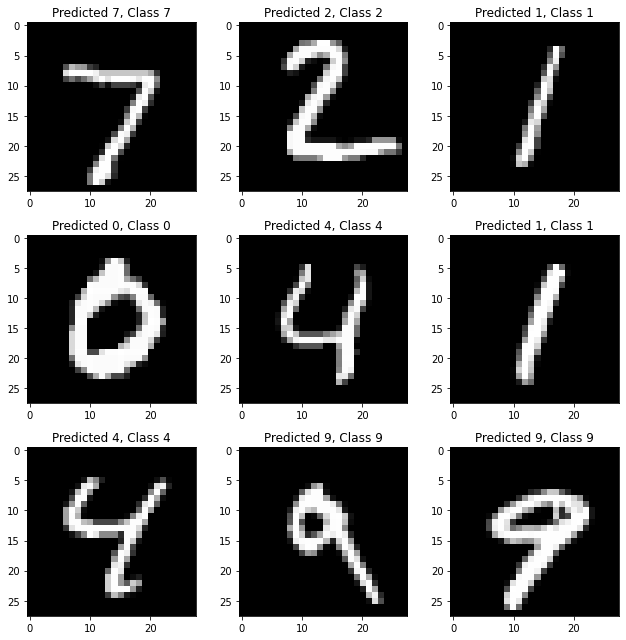

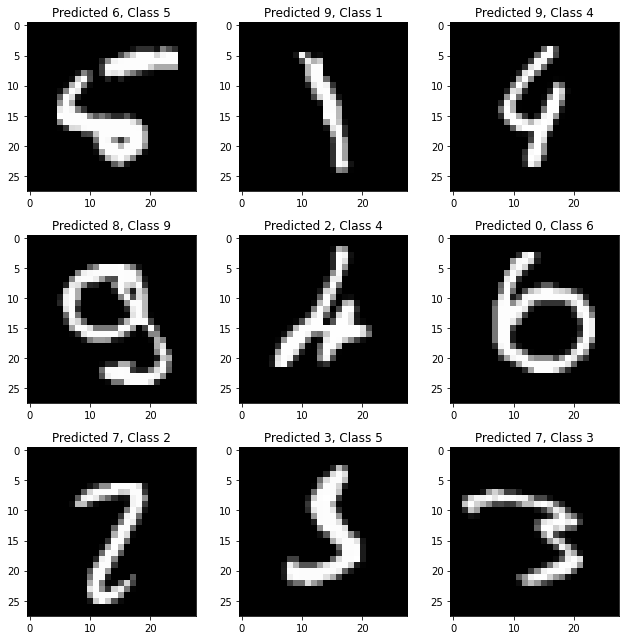

In [138]:
# The first 3x3 subplot has test cases where the model has predicted correctly.
plt.figure()
for i, correct in enumerate(correct_indices[:9]): #enumerate will give tuple of (count,index)
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()

# The next 3x3 subplot has test cases where the model has predicted incorrectly.
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()



---

# **Method 2: Using Convolution**

Here, we would feed different features of each image into a network, and have the network learn which features are important for classifying an image 

---



# **Step 1: Importing additional libraries**

In [190]:
from keras.preprocessing.image import ImageDataGenerator # Library contains utilities for image preprocessing 
                                                         # and augmentation.
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten #Methods to extract information from the image
from keras.layers.normalization.batch_normalization import BatchNormalization # For Batch normalization method

# **Step 2: Dividing the dataset into test and train.**

In [191]:
(X_train, y_train), (X_test,y_test) = mnist.load_data()

In [192]:
X_train.shape

(60000, 28, 28)

## **Step 3: Feature Transformation.**

A. Reshaping the train and test data to 28 x 28 x 1.We are not gonna directly use flattening. Here, we are also adding an additional dimension to represent a single channel (black/White).

In [193]:
X_train = X_train.reshape(60000 , 28,28,1)  # reshape 60,000 28 x 28 matrices into 28 x 28 x 1
X_test = X_test.reshape(10000, 28,28,1)     # reshape 10,000 28 x 28 matrices into 28 x 28 x 1

In [194]:
X_train.dtype

dtype('uint8')

B. All the math involved for neural network is continuous and not discrete, if we do not convert the data type explicitly, at some point in pipeline the values will be converted to float. Also, it is the best practice to convert the values explicitly as some frameworks might give the error when the inputs are not of expected data type.

In [195]:
X_train = X_train.astype('float32')  #Change integers to 32-bit floating point
X_test = X_test.astype('float32')

C. Normailizing using min-max Method

The reason why we normalize each pixel value is neural network learns its weights by continually adding gradient error vectors (multiplied by a learning rate) computed from backpropagation to various weight matrices throughout the network as training examples are passed through.

If we didn't scale our input training vectors, the ranges of our distributions of feature values would likely be different for each feature, and thus the learning rate would cause corrections in each dimension that would differ (proportionally speaking) from one another. We might be over compensating a correction in one weight dimension while undercompensating in another.

This is non-ideal as we might find ourselves in a oscillating (unable to center onto a better maxima in cost(weights) space) state or in a slow moving (traveling too slow to get to a better maxima) state.

In [196]:
X_train /=255 #normalize each value for each pixel
X_test /=255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


D. Converting the dependent variable to vectors which will consists 1 and 0s. 1 - The image is of that particular Category. 0 - The image is not of that particular Category.

The classes (unique digits) are to be in the one-hot encoding formating, i.e

0 = [1,0,0,0,0,0,0,0,0,0]

1 = [0,1,0,0,0,0,0,0,0,0]

etc

In [197]:
nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# **Step 4: Model Building**

A. We create a sequential object, which is used to simply arranging the Keras layers in a sequential order and so, it is called Sequential API. Most of the ANN also has layers in sequential order and the data flows from one layer to another layer in the given order until the data finally reaches the output layer.

In [198]:
model = Sequential()                                 # Linear stacking of layers

B. Creating the first Convolution Layer, the parameters involved are:
1. filters: To specify the number of feature detectors. Here, we specify it as 32
2. kernal_size: The size of the kernal, in our case it is 3 x 3.
3. input_shape: Here, we specify the order of the input for the first layer.

In [199]:
# Convolution Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) # 32 different 3x3 kernels -- so 32 feature maps

C. Applying Batch normalization:
It is a process to make neural networks faster and more stable through adding extra layers in a deep neural network. The new layer performs the standardizing and normalizing operations on the input of a layer coming from a previous layer.The normalizing process in batch normalization takes place in batches, not as a single input. The process involved is as follow:

1. Calculate the mean of the hidden activation.
2. Calculate the SD of the hidden activation.
3. Finally the smoothing is done using the formula:

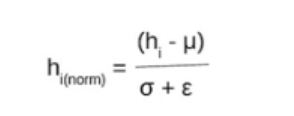

Where epsilon is the smoothing term which assures numerical stability within the operation by stopping a division by a zero value.

Step 4: Rescalling and offsetting of the inputs are done using the two components of the BN algorithm, gamma and β.These two are learnable parameters, during the training neural network ensures the optimal values of γ and β are used. That will enable the accurate normalization of each batch.

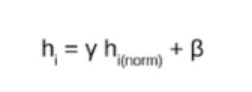

The parameter used is:

axis: This takes integer value, here we specify the feature whic needs to normalized.


In [146]:
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation


D. Now an activation function which is a non-linear function is applied to the output of the layer 1. This activation function checks the output of each node and decides whether the node has fired or not. The activation function used here is 'Rectified Linear Unit (ReLU) it converts all negative inputs to the node in the next layer to be zero. These inputs are then not considered to be fired. The positive values are unchanged.

Explained in deatil in the previous part Method: Without Convolution.

In [147]:
convLayer01 = Activation('relu')  
model.add(convLayer01)                   

E. Adding the second Covolution Layer. Here too we have 32 kernals and we would get 32 feature map after the operation. We also perform the batch normalization before the applying the ReLU activation function.

In [149]:
# Convolution Layer 2
model.add(Conv2D(32, (3, 3)))                        # 32 different 3x3 kernels -- so 32 feature maps

In [150]:
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation

Why do we specifically use ReLU?
The purpose of applying the rectifier function is to increase the non-linearity in our images. The reason we want to do that is that images are naturally non-linear.

When we look at any image, we''ll find it contains a lot of non-linear features (e.g. the transition between pixels, the borders, the colors, etc.).

The rectifier serves to break up the linearity even further in order to make up for the linearity that we might impose an image when we put it through the convolution operation.

In [151]:
model.add(Activation('relu'))                        # activation function used is ReLU

F. **MaxPooling** is applied which downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input. The window is shifted by strides along each dimension. Here, the matrix is of order 2 x 2.

In [152]:
convoLayer02 = MaxPooling2D(pool_size = (2,2))

In [153]:
model.add(convoLayer02)

G. Adding another Convolution layer with 64 kernals, and applying the same steps as before.

In [154]:
# Convolution Layer 3
model.add(Conv2D(64,(3, 3)))                         # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer03 = Activation('relu')                     # activation
model.add(convLayer03)

H. Adding 4th Convolution layer with 64 kernals, and applying the same steps as before. Finally applying flattening.

In [155]:
# Convolution Layer 4
model.add(Conv2D(64, (3, 3)))                        # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer04 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer04)
model.add(Flatten())

I. Next we create a hidden dense layer with 512 Nodes. Next apply Normalization and then activation function ReLU.

In [156]:
# Fully Connected Layer 5
model.add(Dense(512))                                # 512 FCN nodes
model.add(BatchNormalization())                      # normalization
model.add(Activation('relu'))

J. From the previous layer 20% of neurons are randomly selected and considered not active. This is done to avoid over-fitting.And then we finally create the last output layer, which has 10 nodes. And apply the "softmax" function since we have a multiclass problem (10 categories).

In [157]:
# Fully Connected Layer 6                       
model.add(Dropout(0.2))                              # 20% dropout of randomly selected nodes
model.add(Dense(10))                                 # final 10 FCN nodes
model.add(Activation('softmax'))                     # softmax activation

K. By using model.summary(). We get the information about the number of parameters that are involved at each layer. The formula for computing the number of parameters after performing the **Convolution** is 
= ((Dimention of Height * dimension of Width * no. of filters in the previous layer) + 1 (Bias)) * (No of filters in the current layer)

For Eg: 
1. For Con2d_4 - Number of parameters are: ((3 * 3 * 1) + 1)*32) = 320
2. For Con2d_5 - Number of parameters are: ((3 * 3 * 32) + 1)*32) = 9248

The parameter for the **batch normalization** is: Number of Nodes*4 (Which are the four parameters of BN which are: 

**gamma weights, beta weights, moving_mean(non-trainable) and moving_variance(non-trainable)**

For Eg: 

1. 32*4 = 512

Also note: 

1. **Total Params** are the total number of parameters in the model.
2. **Trainable parameter**s are those parameters which are found using the gradient, when we use batch normalization the parameters Gamma and beta are trained using the gradient but the mean and the variance are not, these are known as **non-trainable parameters**. The number of these parameters could be computed as sum of all the layers of (Total Nodes *2)

In [158]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_5 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_15 (Activation)  (None, 26, 26, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_6 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_16 (Activation)  (None, 24, 24, 32)       

# **Step 5: Compiling the model**

As mention previously we will use the same parameters for compiling the model as we had used in the previous method.

In [159]:
# we'll use the adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## **Step 6: Fitting the model**

Image augmentation is a technique of applying different transformations to original images which results in multiple transformed copies of the same image. Each copy, however, is different from the other in certain aspects depending on the augmentation techniques you apply like shifting, rotating, flipping, etc.

Applying these small amounts of variations on the original image does not change its target class but only provides a new perspective of capturing the object in real life. And so, we use it is quite often for building deep learning models.The various parameters used is:

1. **rotation_range** -  allows you to randomly rotate images through any degree between 0 and 360 by providing an integer value in the rotation_range argument.
2. **Random shifts** - It may happen that the object may not always be in the center of the image. To overcome this problem we can shift the pixels of the image either horizontally or vertically; this is done by adding a certain constant value to all the pixels. It has the argument **height_shift_rang**e for a vertical shift of image and **width_shift_range** for a horizontal shift of image.
3. **zoom_range** - The zoom augmentation either randomly zooms in on the image or zooms out of the image. etc

In [160]:
# data augmentation prevents overfitting by slightly changing the data randomly
# Keras has a great built-in feature to do automatic augmentation

gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

Performing the transformation in both the train and test data.

In [161]:
# We can then feed our augmented data in batches
# Besides loss function considerations as before, this method actually results in significant memory savings
# because we are actually LOADING the data into the network in batches before processing each batch
# Before the data was all loaded into memory, but then processed in batches.

train_generator = gen.flow(X_train, Y_train, batch_size=128)
test_generator = test_gen.flow(X_test, Y_test, batch_size=128)

Fiting on the train data

In [162]:
# We can now train our model which is fed data by our batch loader
# Steps per epoch should always be total size of the set divided by the batch size
# SIGNIFICANT MEMORY SAVINGS (important for larger, deeper networks)

model.fit_generator(train_generator, steps_per_epoch=60000//128, #this is basically batch size
                    epochs=5, verbose=1, 
                    validation_data=test_generator,
                    validation_steps= 10000//128)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5
468/468 [==============================] - 137s 289ms/step - loss: 0.1304 - accuracy: 0.9592 - val_loss: 0.1333 - val_accuracy: 0.9590
Epoch 2/5
468/468 [==============================] - 143s 307ms/step - loss: 0.0505 - accuracy: 0.9841 - val_loss: 0.0420 - val_accuracy: 0.9860
Epoch 3/5
468/468 [==============================] - 126s 269ms/step - loss: 0.0412 - accuracy: 0.9876 - val_loss: 0.0352 - val_accuracy: 0.9889
Epoch 4/5
468/468 [==============================] - 140s 300ms/step - loss: 0.0337 - accuracy: 0.9899 - val_loss: 0.0596 - val_accuracy: 0.9808
Epoch 5/5
468/468 [==============================] - 132s 283ms/step - loss: 0.0295 - accuracy: 0.9912 - val_loss: 0.0199 - val_accuracy: 0.9934


# **Step 7: Evaluating the model**
Finally evaluating the model performance.

In [163]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 6s 20ms/step - loss: 0.0199 - accuracy: 0.9934
Test score: 0.019901109859347343
Test accuracy: 0.993399977684021


## **Conclusion:** After performing the additional convolution steps of tranformation there has been an improvement in the performance. Also, since the number of trainable parameters are less in the second method, the overhead computation involved is also less. Thus, the second method is better.